In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
#Data fusion Voltera
#acidentes_clima_df = pd.read_csv('../output/rodovias/acidentes_com_estacoes_climaticas.csv')
#Data fusion Batalhas
acidentes_clima_df = pd.read_csv('../data/DATA_FUSION/BR101-Geral/br101_acidentes_fusionados_single.csv')
acidentes_clima_gdf = gpd.GeoDataFrame(acidentes_clima_df, geometry=gpd.points_from_xy(acidentes_clima_df.longitude, acidentes_clima_df.latitude))
acidentes_clima_df = acidentes_clima_df.drop_duplicates()
print(acidentes_clima_df.columns)
print(acidentes_clima_df.info())
selecao_df = acidentes_clima_df.copy()
selecao_df.dropna(subset=['ano_y', 'geometry.1', 'ano_x', 'mes.1', 'dia','estado.1'], inplace=True)

Index(['n_da_ocorrencia', 'km', 'trecho', 'sentido', 'tipo_de_acidente',
       'automovel', 'bicicleta', 'caminhao', 'moto', 'onibus', 'outros',
       'tracao_animal', 'transporte_de_cargas_especiais', 'trator_maquinas',
       'utilitarios', 'ilesos', 'levemente_feridos', 'moderadamente_feridos',
       'gravemente_feridos', 'mortos', 'concessionaria', 'data_hora',
       'com_vitima', 'estado', 'ano', 'mes', 'rodovia', 'latitude',
       'longitude', 'geometry', 'Data', 'Hora UTC',
       'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
       'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
       'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
       'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
       'RADIACAO GLOBAL (Kj/m²)',
       'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
       'TEMPERATURA DO PONTO DE ORVALHO (°C)',
       'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
       'TEMPERATURA ORVALHO MAX. NA HORA AN

In [32]:
selected_cols = [
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'PRESSAO ATMOSFERICA AO NIVEL DA ESTACAO, HORARIA (mB)',
    'PRESSÃO ATMOSFERICA MAX.NA HORA ANT. (AUT) (mB)',
    'PRESSÃO ATMOSFERICA MIN. NA HORA ANT. (AUT) (mB)',
    'RADIACAO GLOBAL (Kj/m²)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'TEMPERATURA DO PONTO DE ORVALHO (°C)',
    'TEMPERATURA MÁXIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA MÍNIMA NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MAX. NA HORA ANT. (AUT) (°C)',
    'TEMPERATURA ORVALHO MIN. NA HORA ANT. (AUT) (°C)',
    'UMIDADE REL. MAX. NA HORA ANT. (AUT) (%)',
    'UMIDADE REL. MIN. NA HORA ANT. (AUT) (%)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'VENTO, DIREÇÃO HORARIA (gr) (° (gr))',
    'VENTO, RAJADA MAXIMA (m/s)',
    'VENTO, VELOCIDADE HORARIA (m/s)',
]

for col in selecao_df.select_dtypes(include=['object']).columns:
    if col in selected_cols:
        selecao_df[col] = selecao_df[col].str.replace(',', '.').astype(float)

print(selecao_df.info())
print(selecao_df.describe())

<class 'pandas.core.frame.DataFrame'>
Index: 59367 entries, 0 to 59705
Data columns (total 61 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   n_da_ocorrencia                                        59367 non-null  int64  
 1   km                                                     59367 non-null  float64
 2   trecho                                                 59367 non-null  object 
 3   sentido                                                59367 non-null  object 
 4   tipo_de_acidente                                       59367 non-null  object 
 5   automovel                                              59367 non-null  int64  
 6   bicicleta                                              59367 non-null  int64  
 7   caminhao                                               59367 non-null  int64  
 8   moto                                               

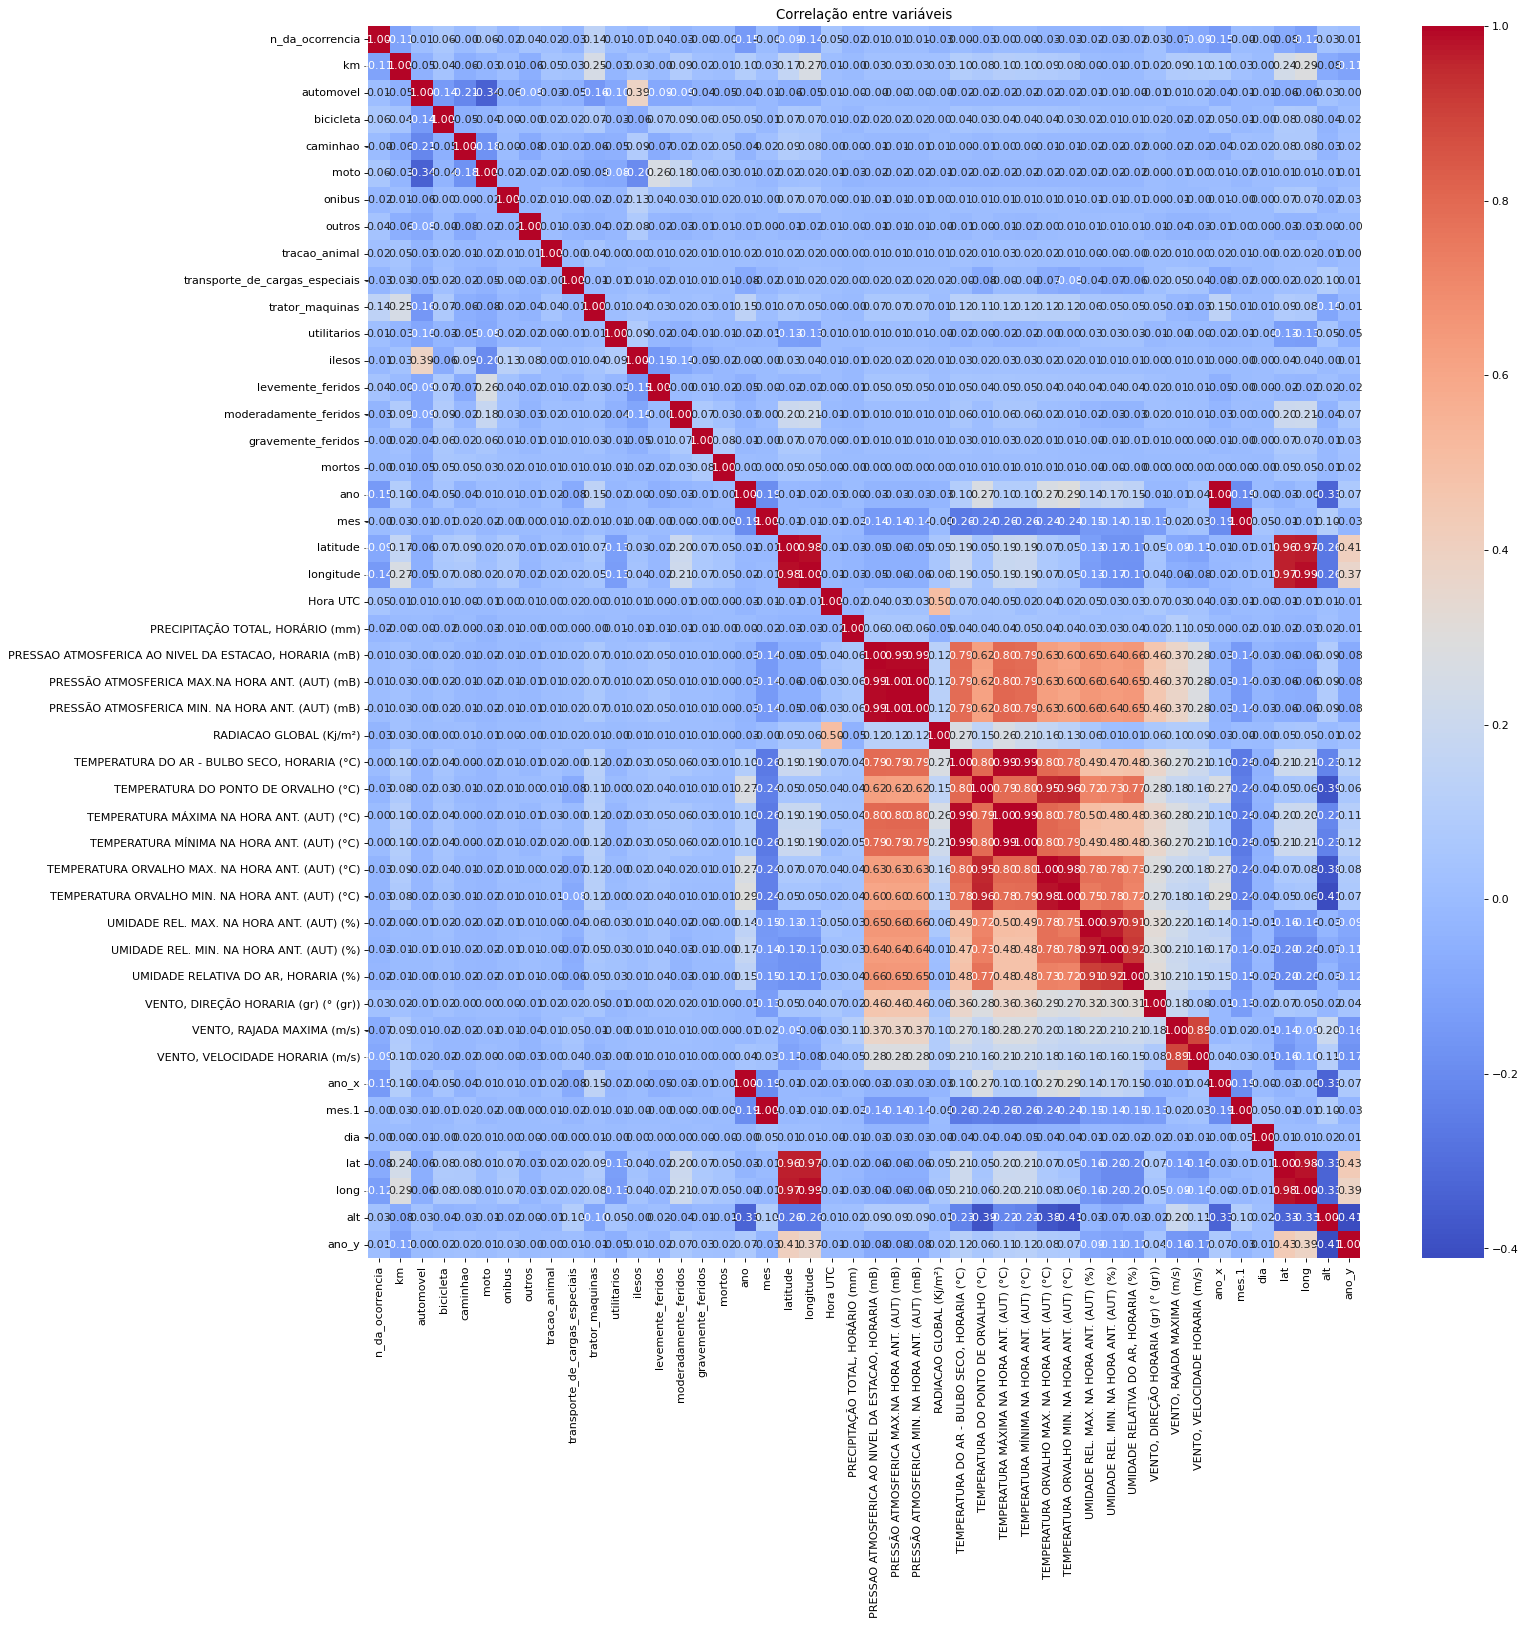

In [33]:
corr_df = selecao_df[selecao_df.select_dtypes(include=['float64', 'int']).columns]

fig, ax = plt.subplots(figsize=(20, 20), dpi=80)
correlation = corr_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', ax=ax, fmt=".2f")
plt.title('Correlação entre variáveis')
fig.savefig('../output/correlacao_acidentes_clima.png')

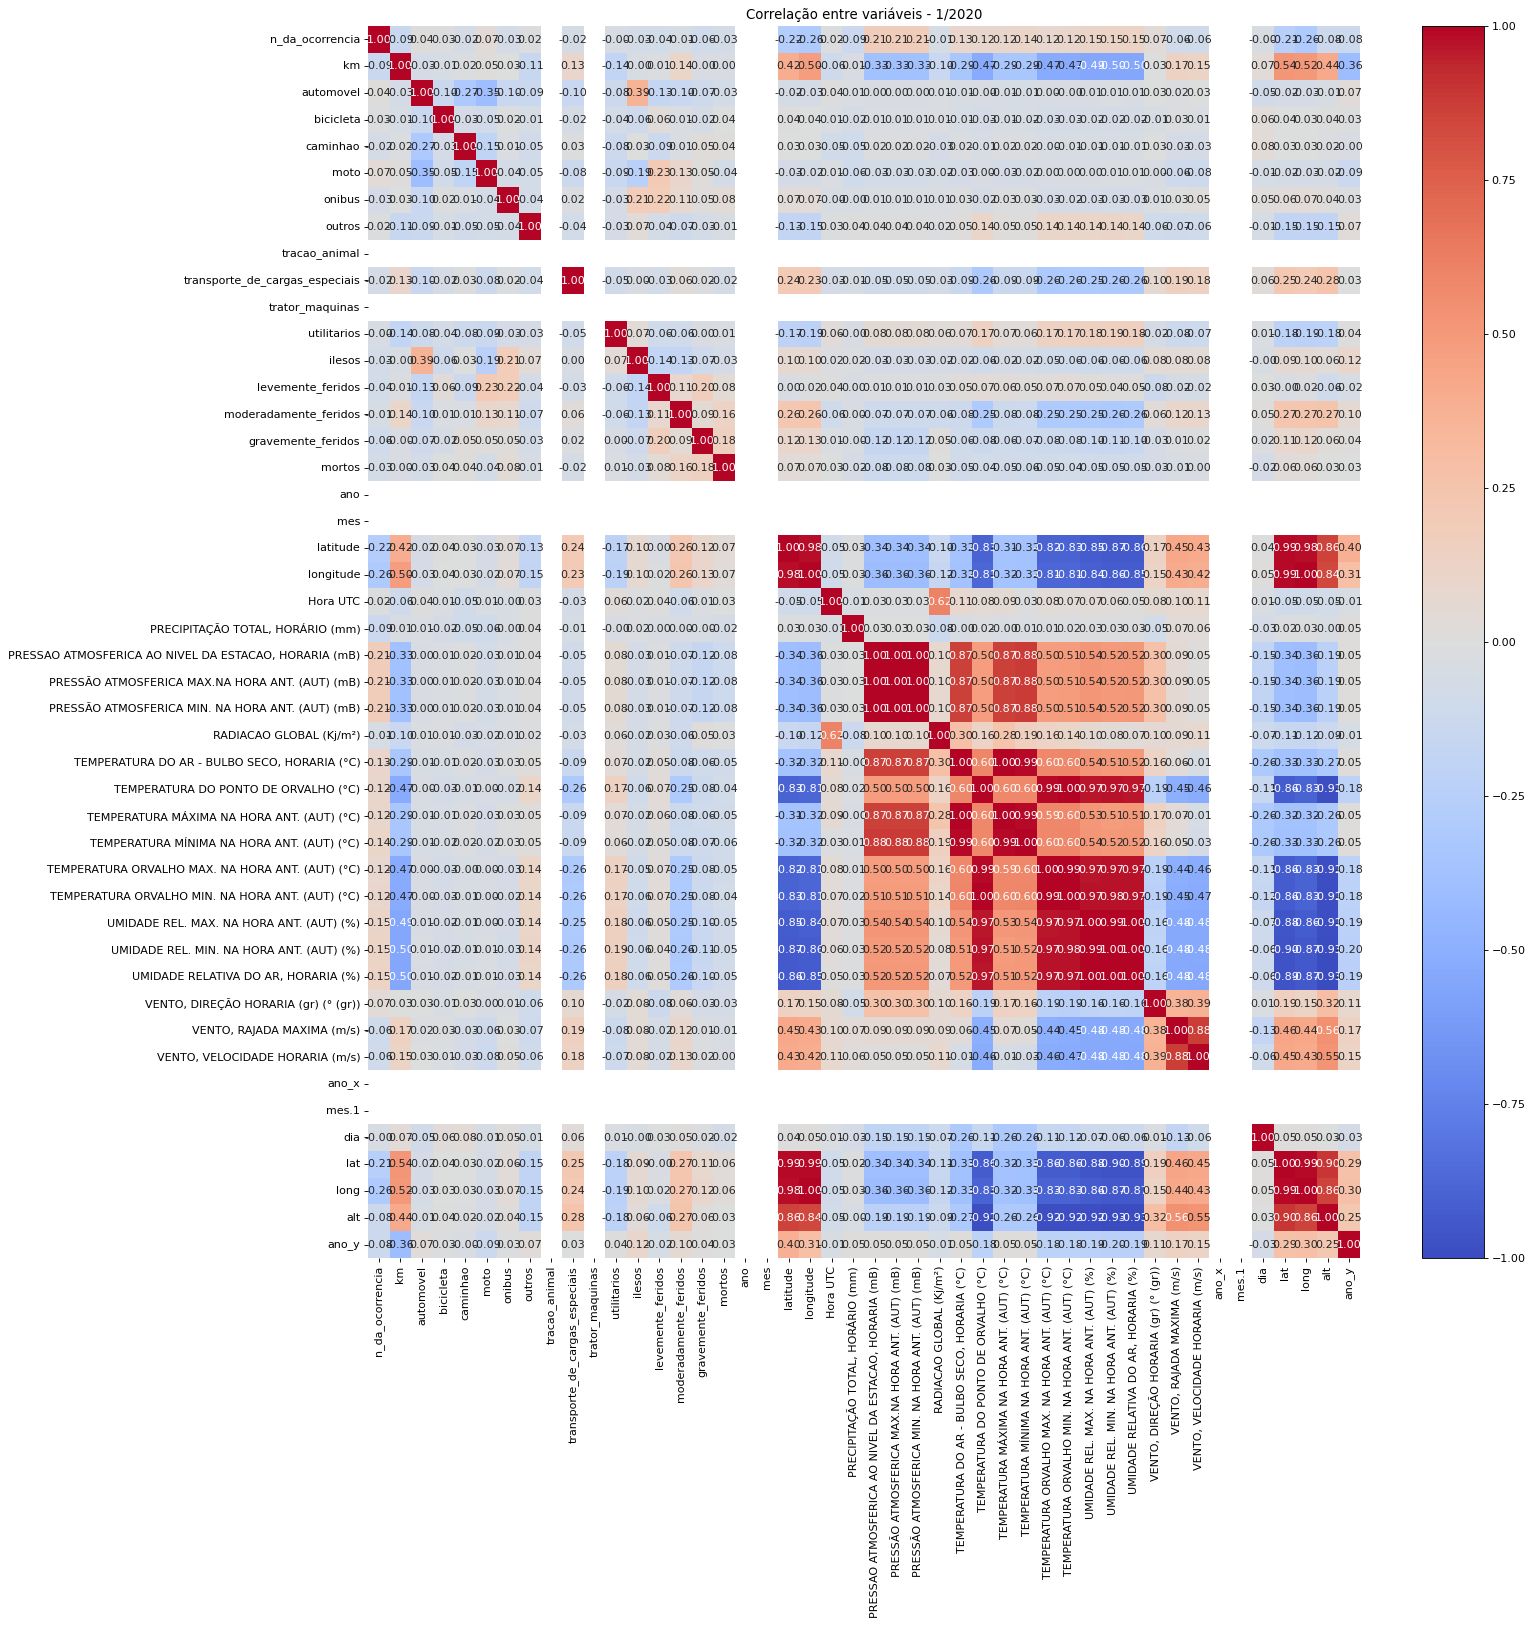

In [34]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
import matplotlib as mpl
import seaborn as sns

def plot_frame(frame, ax, df, meses_unicos):
    ax.clear()
    mes, ano = meses_unicos[frame]

    df_mes_ano = df[(df['mes'] == mes) & (df['ano'] == ano)]
    correlation = df_mes_ano.corr()
    sns.heatmap(correlation, cmap='coolwarm', ax=ax, fmt=".2f", annot=True, cbar=False)
    ax.set_title(f'Correlação entre variáveis - {mes}/{ano}')

fig, ax = plt.subplots(figsize=(20, 20), dpi=80)

# Adicionando a barra de cores para precipitação
norm = mpl.colors.Normalize(vmin=-1, vmax=1)
sm = mpl.cm.ScalarMappable(cmap="coolwarm", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
cbar.ax.yaxis.label.set_size(18)
cbar.ax.yaxis.label.set_color('gray')

mes_ano_pares = selecao_df[['mes', 'ano']].drop_duplicates().sort_values(['ano', 'mes']).to_records(index=False)

# Criando a animação
frames = len(mes_ano_pares)
corr_df = selecao_df[selecao_df.select_dtypes(include=['float64', 'int']).columns]
corr_df = corr_df.fillna(0)
ani = FuncAnimation(fig, plot_frame, fargs=(ax, corr_df, mes_ano_pares), frames=frames, interval=1000, repeat=True)

# Salvar ou exibir a animação
from matplotlib.animation import PillowWriter
ani.save("../output/matriz_corr_mensal.gif", writer=PillowWriter(fps=1))


In [35]:
#Data fusion Voltera  
#pista_gdf = gpd.read_file('../data/DATA_FUSION/data/relevantes/BR-101-SC/pista_principal_br101sc.csv')
#Data fusion Batalhas
pista_gdf = gpd.read_file('../data/DATA_FUSION/BR101-Geral/br101_pista.csv')
pista_gdf.head()

concessionaria ano_do_pnv_snv    rodovia     km_m      sentido    latitude  \
0         ECO101           2020  BR-101/BA  939.494    Crescente  -18.042508   
1         ECO101           2020  BR-101/BA  939.494  Decrescente  -18.042508   
2         ECO101           2020  BR-101/BA  939.514    Crescente  -18.042686   
3         ECO101           2020  BR-101/BA  939.514  Decrescente  -18.042686   
4         ECO101           2020  BR-101/BA  939.534    Crescente  -18.042859   

    longitude geometry  
0  -39.866789     None  
1  -39.866789     None  
2  -39.866829     None  
3  -39.866829     None  
4  -39.866867     None

In [36]:
'''relevante_df = acidentes_clima_df[[
    'ilesos', 
    'levemente_feridos', 
    'moderadamente_feridos',
    'gravemente_feridos',
    'mortos', 
    'com_vitima',
    'ano',
    'mes',
    'latitude',
    'longitude',
    'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
    'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)',
    'VENTO, VELOCIDADE HORARIA (m/s)',
    'UMIDADE RELATIVA DO AR, HORARIA (%)',
    'Data'
    ]]'''

relevante_df = selecao_df.copy()


print(relevante_df.info())

for col in relevante_df.columns:
    if ',' in relevante_df[col].values:
        relevante_df[col] = relevante_df[col].str.replace(',', '.').astype(float)

print(relevante_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 59367 entries, 0 to 59705
Data columns (total 61 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   n_da_ocorrencia                                        59367 non-null  int64  
 1   km                                                     59367 non-null  float64
 2   trecho                                                 59367 non-null  object 
 3   sentido                                                59367 non-null  object 
 4   tipo_de_acidente                                       59367 non-null  object 
 5   automovel                                              59367 non-null  int64  
 6   bicicleta                                              59367 non-null  int64  
 7   caminhao                                               59367 non-null  int64  
 8   moto                                               

In [37]:
precipitacao_latlog_df = relevante_df[['latitude', 'longitude', 'PRECIPITAÇÃO TOTAL, HORÁRIO (mm)', 'Data', 'ano', 'mes']] 
temperatura_latlog_df = relevante_df[['latitude', 'longitude', 'TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)', 'Data', 'ano', 'mes']]

acidentes_df = relevante_df
acidentes_gdf = gpd.GeoDataFrame(acidentes_df, geometry=gpd.points_from_xy(acidentes_df.longitude, acidentes_df.latitude))

/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


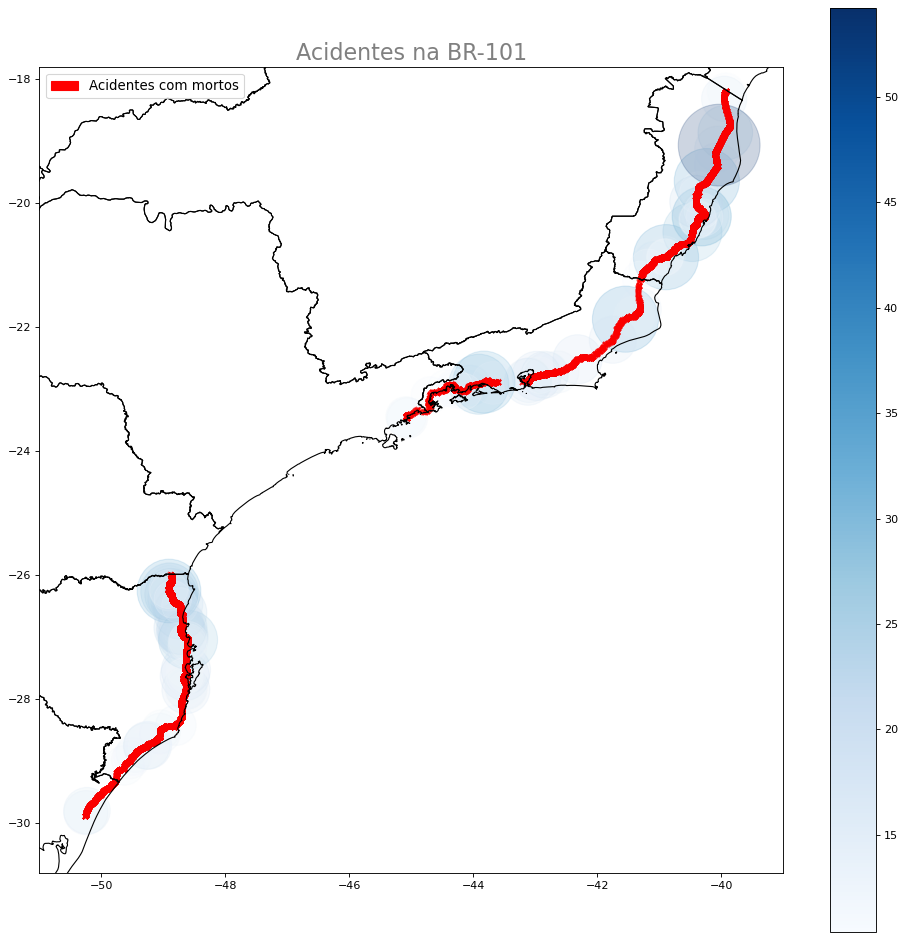

In [38]:
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns

url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
background = gpd.read_file(url)

fig, ax = plt.subplots(figsize=(15, 15), dpi=80)
background.boundary.plot(ax=ax, linewidth=1, color='black')  # Plota as bordas dos estados
background.plot(ax=ax, color='white')  # Plota os estados


acidentes_clima_gdf = gpd.GeoDataFrame(precipitacao_latlog_df, geometry=gpd.points_from_xy(precipitacao_latlog_df.longitude, precipitacao_latlog_df.latitude))
acidentes_clima_gdf = acidentes_clima_gdf[acidentes_clima_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] > 10]
acidentes_clima_gdf.plot(column='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
                         ax=ax,
                         legend=True,
                         cmap='Blues',
                         markersize=acidentes_clima_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] * 100,
                         alpha=0.2)

acidentes_gdf.plot(ax=ax, color='red', alpha=0.2, markersize=20, marker='x')

acidentes_patch = mpatches.Patch(color='red', label='Acidentes com mortos')
#pista_patch = mpatches.Patch(color='darkred', label='BR-101/SC')

plt.legend(handles=[acidentes_patch], fontsize=12, loc='best')
# br101 sc
#plt.ylim(-29.4, -25.9)
#plt.xlim(-50, -48.25)
#plt.title('Acidentes na BR-101/SC', fontsize=20, color='gray')

# br101 geral
plt.ylim(-30.8, -17.8)
plt.xlim(-51, -39)
plt.title('Acidentes na BR-101', fontsize=20, color='gray')
plt.show()

/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


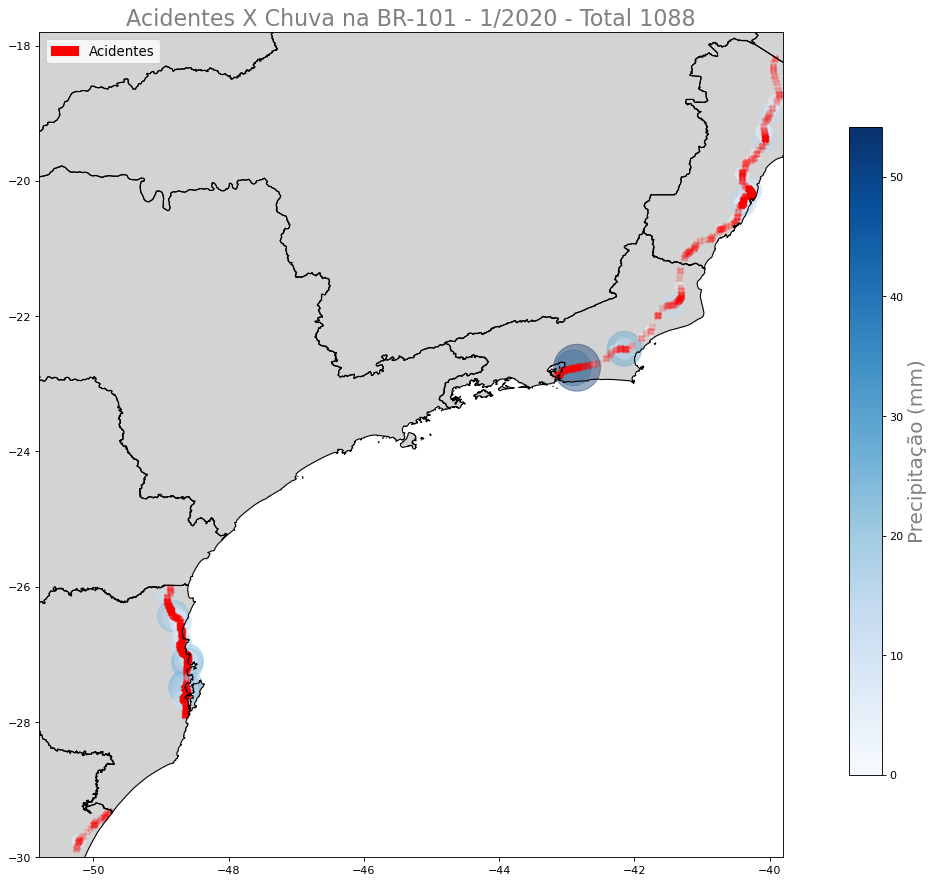

In [39]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

def plot_frame(frame, ax, precipitacao_gdf, acidentes_gdf, background, norm, sm):
    ax.clear()
    mes, ano = mes_ano_pares[frame]  # mês e ano atual
    
    # Plotando os estados do Brasil
    background.boundary.plot(ax=ax, linewidth=1, color='black') 
    background.plot(ax=ax, color='lightgray') 
    
    # Filtrando dados para o mês e ano
    precipitacao_mes = precipitacao_gdf[(precipitacao_gdf['mes'] == mes) & (precipitacao_gdf['ano'] == ano)]
    acidentes_mes = acidentes_gdf[(acidentes_gdf['mes'] == mes) & (acidentes_gdf['ano'] == ano)]
    
    # Plotando precipitação
    if not precipitacao_mes.empty:
        precipitacao_mes = precipitacao_mes[precipitacao_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] > 0]
        precipitacao_mes.plot(
            column='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
            ax=ax,
            cmap='Blues',
            markersize=precipitacao_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] * 100,
            alpha=0.4,
        )
    
    # Plotando acidentes
    if not acidentes_mes.empty:
        acidentes_mes.plot(
            ax=ax, 
            color='red', 
            alpha=0.15, 
            markersize=35,
            marker='X',
        )

    red_patch = mpatches.Patch(color='red', label='Acidentes')
    ax.legend(handles=[red_patch], fontsize=12, loc='upper left')
    
    # Configurações do gráfico
    #br101 sc
    #plt.ylim(-29.4, -25.9)
    #plt.xlim(-50, -48.25)
    #plt.title(f'Acidentes X Chuva na BR-101/SC - {mes}/{ano} - Total {len(acidentes_mes)}', fontsize=20, color='gray')

    # br101 geral
    plt.ylim(-30, -17.8)
    plt.xlim(-50.8, -39.8)
    plt.title(f'Acidentes X Chuva na BR-101 - {mes}/{ano} - Total {len(acidentes_mes)}', fontsize=20, color='gray')

# Lendo os dados do mapa
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
br_states = gpd.read_file(url)

precipitacao_latlog_gdf = gpd.GeoDataFrame(
    precipitacao_latlog_df, geometry=gpd.points_from_xy(precipitacao_latlog_df.longitude, precipitacao_latlog_df.latitude)
).sort_values(['ano', 'mes'])
acidentes_gdf = gpd.GeoDataFrame(
    acidentes_df, geometry=gpd.points_from_xy(acidentes_df.longitude, acidentes_df.latitude)
).sort_values(['ano', 'mes'])

mes_ano_pares = acidentes_gdf[['mes', 'ano']].drop_duplicates().sort_values(['ano', 'mes']).to_records(index=False)

# Configurando o plot
fig, ax = plt.subplots(figsize=(15, 15), dpi=80)

# Adicionando a barra de cores para precipitação
norm = mpl.colors.Normalize(vmin=precipitacao_latlog_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].min(),
                            vmax=precipitacao_latlog_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].max())
sm = mpl.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", label="Precipitação (mm)",)
cbar.ax.yaxis.label.set_size(18)
cbar.ax.yaxis.label.set_color('gray')

# br101 geral
cbar.ax.set_position([0.8, 0.22, 0.03, 0.54])# [x, y, largura, altura]

# Adicionando uma legenda fixa
red_patch = mpatches.Patch(color='red', label='Acidentes')
ax.legend(handles=[red_patch], fontsize=16, loc='upper left')

# Criando a animação
frames = len(mes_ano_pares)
ani = FuncAnimation(
    fig, plot_frame, fargs=(ax, precipitacao_latlog_gdf, acidentes_gdf, br_states, norm, sm),
    frames=frames, interval=1000, repeat=True
)

# Salvar ou exibir a animação
from matplotlib.animation import PillowWriter
ani.save("../output/animacao_acidentes_precipitacao.gif", writer=PillowWriter(fps=1))


/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


2176
1088
2176
1088
1916
958
1486
743
1062
531
1404
702
1642
821
1592
796
1754
877
1952
976
2310
1155
2058
1029
2324
1162
2076
1038
1814
907
1622
811
1716
858
2320
1160
2262
1131
2328
1164
2300
1150
2288
1144
2512
1256
2246
1123
2806
1403
2366
1183
2126
1063
2276
1138
2050
1025
2332
1166
1990
995
2300
1150
2230
1115
2508
1254
2434
1217
2460
1230
2788
1394
2948
1474
2440
1220
2396
1198
2272
1136
2300
1150
2174
1087
2406
1203
2198
1099
2064
1032
2276
1138
2390
1195
2876
1438
2568
1284
2136
1068
1948
974
1938
969
1952
976
1848
924
1778
889
2176
1088


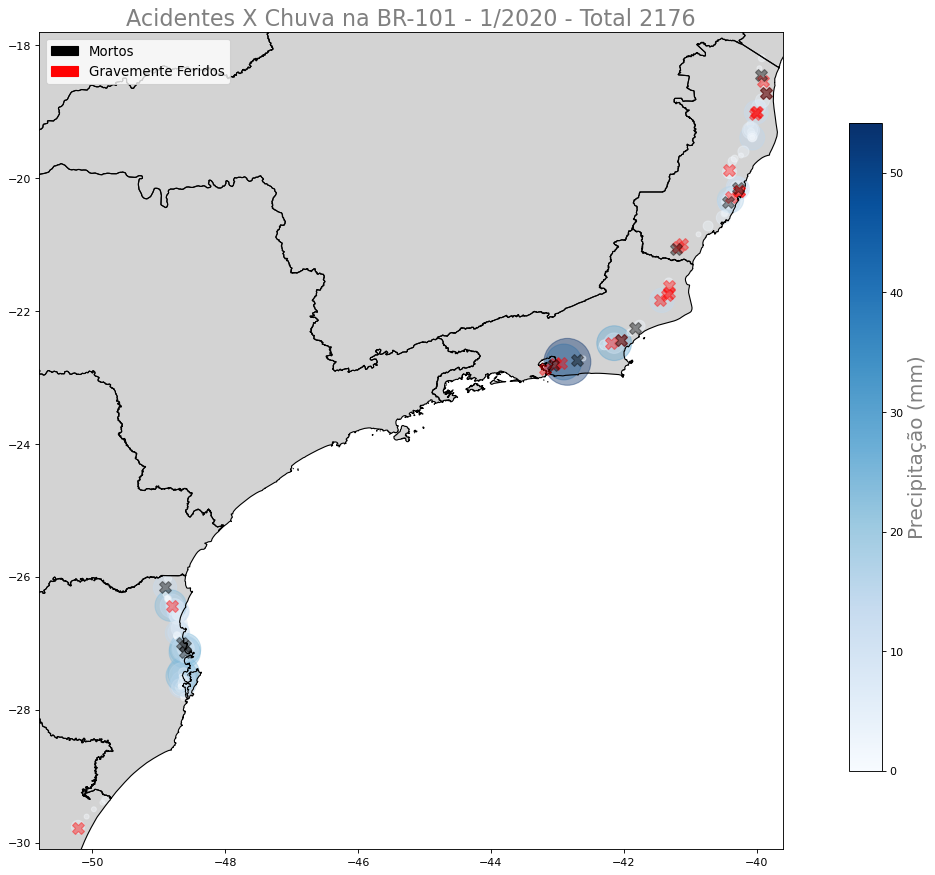

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.animation import FuncAnimation
import matplotlib as mpl

def plot_frame(frame, ax, precipitacao_gdf, acidentes_gdf, background, norm, sm):
    ax.clear()
    mes, ano = mes_ano_pares[frame]  # mês e ano atual
    
    # Plotando os estados do Brasil
    background.boundary.plot(ax=ax, linewidth=1, color='black') 
    background.plot(ax=ax, color='lightgray') 
    
    # Filtrando dados para o mês e ano
    precipitacao_mes = precipitacao_gdf[(precipitacao_gdf['mes'] == mes) & (precipitacao_gdf['ano'] == ano)]
    acidentes_mes = acidentes_gdf[(acidentes_gdf['mes'] == mes) & (acidentes_gdf['ano'] == ano)]
    
    # Plotando precipitação
    if not precipitacao_mes.empty:
        precipitacao_mes = precipitacao_mes[precipitacao_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] > 0]
        precipitacao_mes.plot(
            column='PRECIPITAÇÃO TOTAL, HORÁRIO (mm)',
            ax=ax,
            cmap='Blues',
            markersize=precipitacao_mes['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] * 100,
            alpha=0.4,
        )
    
    # Plotando acidentes
    if not acidentes_mes.empty:
        for i, acidente in acidentes_mes.iterrows():
            if acidente['mortos'] > 0:
                ax.plot(acidente['longitude'], acidente['latitude'], 'black', markersize=10, marker='X', alpha=0.4, zorder=5)
            # if acidente['ilesos'] > 0:
            #     ax.plot(acidente['longitude'], acidente['latitude'], 'green', markersize=8, marker='o', alpha=0.2, zorder=1)
            # if acidente['levemente_feridos'] > 0:
            #     ax.plot(acidente['longitude'], acidente['latitude'], 'yellow', markersize=8, marker='o', alpha=0.2, zorder=2)
            # if acidente['moderadamente_feridos'] > 0:
            #     ax.plot(acidente['longitude'], acidente['latitude'], 'orange', markersize=8, marker='o', alpha=0.2, zorder=3)
            if acidente['gravemente_feridos'] > 0:
                ax.plot(acidente['longitude'], acidente['latitude'], 'red', markersize=10, marker='X', alpha=0.4, zorder=4)


    black_patch = mpatches.Patch(color='black', label='Mortos')
    # green_patch = mpatches.Patch(color='green', label='Ilesos')
    # yellow_patch = mpatches.Patch(color='yellow', label='Levemente Feridos')
    # orange_patch = mpatches.Patch(color='orange', label='Moderadamente Feridos')
    red_patch = mpatches.Patch(color='red', label='Gravemente Feridos')
    # ax.legend(handles=[black_patch, green_patch, yellow_patch, orange_patch, red_patch], fontsize=12, loc='upper left')
    ax.legend(handles=[black_patch, red_patch], fontsize=12, loc='upper left')
    
    # Configurações do gráfico
    #br101 sc
    #plt.ylim(-29.4, -25.9)
    #plt.xlim(-50, -48.25)
    #plt.title(f'Acidentes X Chuva na BR-101/SC - {mes}/{ano} - Total {len(acidentes_mes)}', fontsize=20, color='gray')

    # br101 geral
    plt.ylim(-30.1, -17.8)
    plt.xlim(-50.8, -39.6)
    plt.title(f'Acidentes X Chuva na BR-101 - {mes}/{ano} - Total {len(acidentes_mes['mortos']) + len(acidentes_mes['gravemente_feridos'])}', fontsize=20, color='gray')


# Lendo os dados do mapa
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
br_states = gpd.read_file(url)

precipitacao_latlog_gdf = gpd.GeoDataFrame(
    precipitacao_latlog_df, geometry=gpd.points_from_xy(precipitacao_latlog_df.longitude, precipitacao_latlog_df.latitude)
).sort_values(['ano', 'mes'])
acidentes_gdf = gpd.GeoDataFrame(
    acidentes_df, geometry=gpd.points_from_xy(acidentes_df.longitude, acidentes_df.latitude)
).sort_values(['ano', 'mes'])

mes_ano_pares = acidentes_gdf[['mes', 'ano']].drop_duplicates().sort_values(['ano', 'mes']).to_records(index=False)

# Configurando o plot
fig, ax = plt.subplots(figsize=(15, 15), dpi=80)

# Adicionando a barra de cores para precipitação
norm = mpl.colors.Normalize(vmin=precipitacao_latlog_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].min(),
                            vmax=precipitacao_latlog_gdf['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].max())
sm = mpl.cm.ScalarMappable(cmap="Blues", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", label="Precipitação (mm)")
cbar.ax.yaxis.label.set_size(18)
cbar.ax.yaxis.label.set_color('gray')

# br101 geral
cbar.ax.set_position([0.8, 0.22, 0.03, 0.54])# [x, y, largura, altura]

# Criando a animação
frames = len(mes_ano_pares)
ani = FuncAnimation(
    fig, plot_frame, fargs=(ax, precipitacao_latlog_gdf, acidentes_gdf, br_states, norm, sm),
    frames=frames, interval=1000, repeat=True
)

# Salvar ou exibir a animação
from matplotlib.animation import PillowWriter
ani.save("../output/animacao_gravidade_precipitacao.gif", writer=PillowWriter(fps=1))


/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")
/home/guibatalhoti/Dados_ANTT/_env/lib/python3.12/site-packages/geopandas/io/file.py:399: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_datetime without passing `errors` and catch exceptions explicitly instead
  as_dt = pd.to_datetime(df[k], errors="ignore")


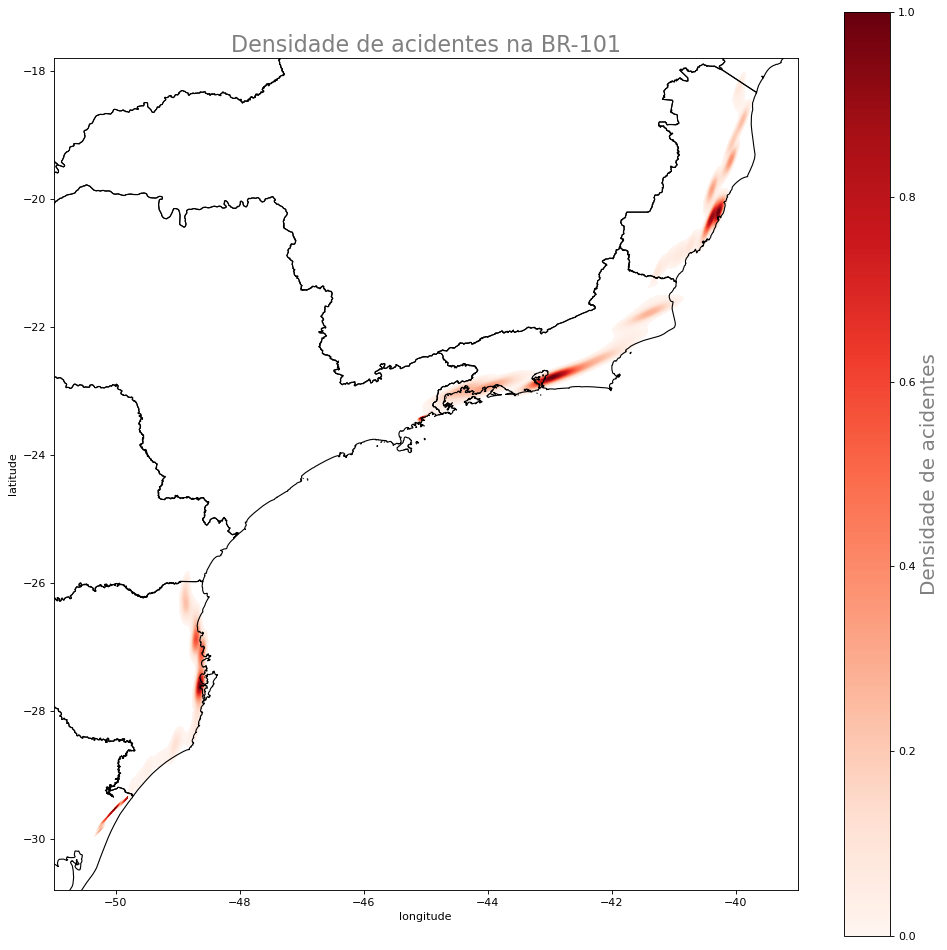

In [12]:
url = 'https://raw.githubusercontent.com/codeforamerica/click_that_hood/master/public/data/brazil-states.geojson'
br_states = gpd.read_file(url)

fig, ax = plt.subplots(figsize=(15, 15), dpi=80)
br_states.boundary.plot(ax=ax, linewidth=1, color='black')  # Plota as bordas dos estados
br_states.plot(ax=ax, color='white')  # Plota os estados

#br101 sc
#sns.kdeplot(data=acidentes_gdf, x='longitude', y='latitude', fill=True, levels=100, cmap='Reds', ax=ax, cbar=True, legend=True)

#plt.ylim(-29.4, -25.9)
#plt.xlim(-50, -48.25)
#plt.title('Densidade de acidentes na BR-101/SC', fontsize=20, color='gray')

#br101 geral

for rodovias in acidentes_gdf['rodovia'].unique():
    sns.kdeplot(data=acidentes_gdf[acidentes_gdf['rodovia'] == rodovias], x='longitude', y='latitude', fill=True, levels=100, cmap='Reds', ax=ax,legend=True,)

norm = mpl.colors.Normalize(vmin=0, vmax=1)
sm = mpl.cm.ScalarMappable(cmap="Reds", norm=norm)
sm.set_array([])
cbar = fig.colorbar(sm, ax=ax, orientation="vertical", label="Densidade de acidentes")
cbar.ax.yaxis.label.set_size(18)
cbar.ax.yaxis.label.set_color('gray')

plt.ylim(-30.8, -17.8)
plt.xlim(-51, -39)
plt.title('Densidade de acidentes na BR-101', fontsize=20, color='gray')
plt.show()

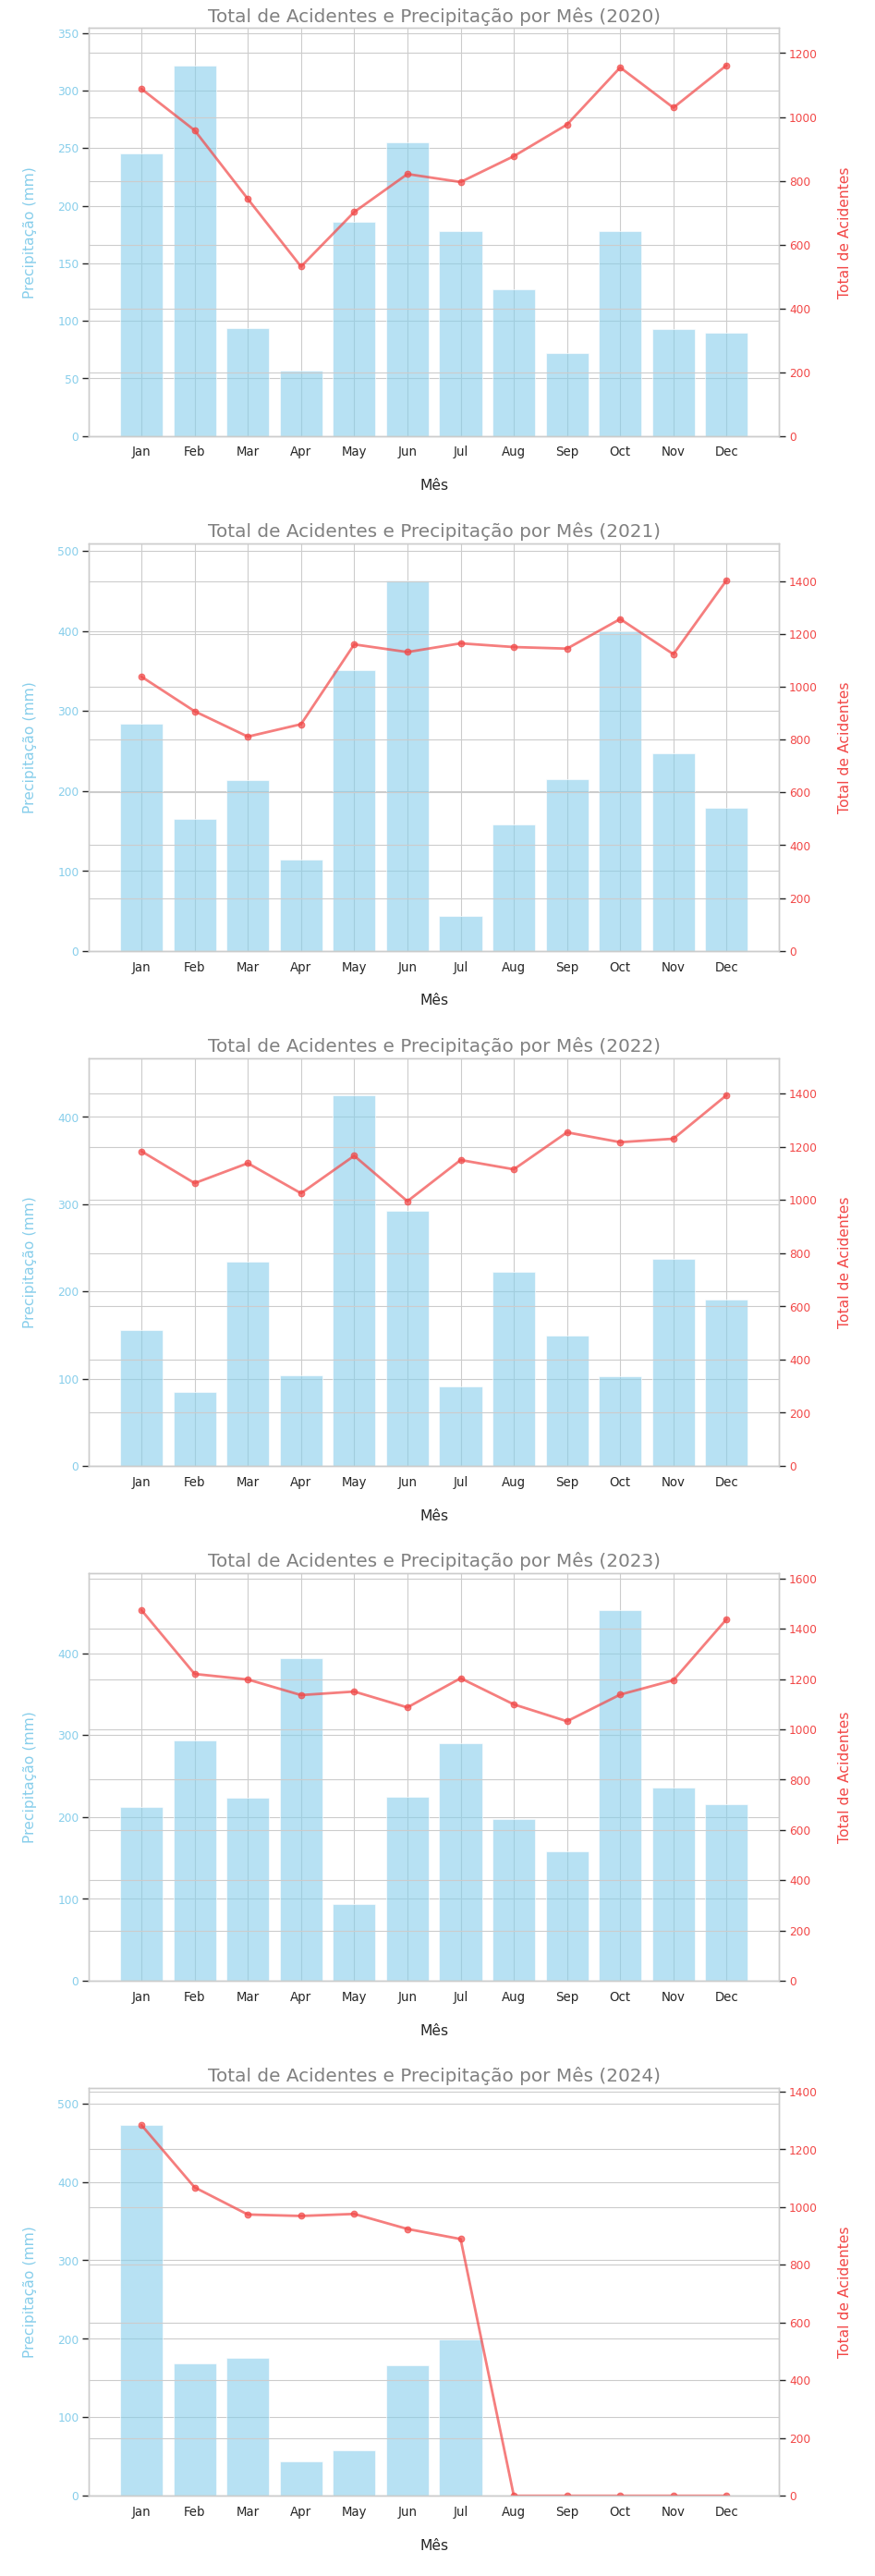

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agregando os dados
acidentes_group = acidentes_df.groupby(['ano', "mes"]).count().reset_index()
precipitacao_group = precipitacao_latlog_df.groupby(['ano', "mes"]).sum().reset_index()

# Configuração do estilo do Seaborn
sns.set_theme(style="whitegrid")

# Garantir que os meses estejam como inteiros
acidentes_group["mes"] = acidentes_group["mes"].astype(int)
precipitacao_group["mes"] = precipitacao_group["mes"].astype(int)

# Criar DataFrame de referência para garantir meses 1-12
todos_meses = pd.DataFrame({"mes": range(1, 13)})

# Criar a figura e os subplots
fig, axs = plt.subplots(len(acidentes_group['ano'].unique()), 1, figsize=(12, 7 * len(acidentes_group['ano'].unique())), dpi=80)

# Loop para cada ano
for i, ano in enumerate(acidentes_group['ano'].unique()):
    ax1 = axs[i] if len(acidentes_group['ano'].unique()) > 1 else axs

    # Dados do ano atual
    acidentes_ano = acidentes_group[acidentes_group['ano'] == ano]
    precitacao_ano = precipitacao_group[precipitacao_group['ano'] == ano]

    # Garantir que ambos os DataFrames tenham todos os meses
    acidentes_ano = pd.merge(todos_meses, acidentes_ano, on="mes", how="left").fillna(0)
    precitacao_ano = pd.merge(todos_meses, precitacao_ano, on="mes", how="left").fillna(0)

    plt.grid(axis='x', color='white', alpha=0)

    # Barras para precipitação
    ax1.bar(
        precitacao_ano["mes"],  # Garantir que os meses estão no eixo X
        precitacao_ano["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"], 
        color="skyblue", 
        alpha=0.6, 
        label="Precipitação"
    )
    ax1.set_ylabel("\nPrecipitação (mm)\n", fontsize=14, color="skyblue")
    ax1.tick_params(axis="y", labelcolor="skyblue")
    ax1.set_ylim(0, precitacao_ano["PRECIPITAÇÃO TOTAL, HORÁRIO (mm)"].max() * 1.1)

    # Linha para acidentes
    ax2 = ax1.twinx()
    ax2.plot(
        acidentes_ano["mes"],  # Garantir que os meses estão no eixo X
        acidentes_ano["Data"],  # Ajustado para o campo correto
        color="#f24847", 
        alpha=0.7, 
        marker='o', 
        linewidth=2.5, 
        markersize=6, 
        label="Acidentes"
    )
    ax2.set_ylabel("\nTotal de Acidentes\n", fontsize=14, color="#f24847")
    ax2.tick_params(axis="y", labelcolor="#f24847")
    ax2.set_ylim(0, acidentes_ano["Data"].max() * 1.1)

    # Personalização do eixo X
    ax1.set_xticks(range(1, 13))  # Garante que o eixo vai de 1 a 12 (meses)
    ax1.set_xticklabels(
        ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
        fontsize=12,
        rotation=0,
        ha='center'
    )
    ax1.set_xlabel("\nMês\n", fontsize=14)

    # Título
    ax1.set_title(f"Total de Acidentes e Precipitação por Mês ({ano})", fontsize=18, color="gray")

# Ajuste do layout
plt.tight_layout()
plt.show()


In [14]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Agregando os dados
acidentes_diarios = acidentes_df.groupby(['Data', 'ano', 'mes']).size().reset_index(name='num_acidentes')
precipitacao_diaria = precipitacao_latlog_df.groupby(['Data', 'ano', 'mes'])['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum().reset_index()

# Unindo os DataFrames
df_consolidado = pd.merge(acidentes_diarios, precipitacao_diaria, on=['Data', 'ano', 'mes'], how='inner')

# Lista de anos únicos
anos = df_consolidado['ano'].unique()

# Criando subplots com um gráfico por ano
fig = make_subplots(rows=len(anos), cols=1, 
                    subplot_titles=[f"Ano: {ano}" for ano in anos])

# Adicionando dados ao gráfico
for i, ano in enumerate(anos, start=1):
    dados_ano = df_consolidado[df_consolidado['ano'] == ano]
    
    # Linha para Número de Acidentes
    fig.add_trace(
        go.Scatter(
            x=dados_ano['Data'], 
            y=dados_ano['num_acidentes'], 
            mode='lines+markers',
            name=f"Número de Acidentes ({ano})",
            line=dict(color='#f24847', width=2),
            marker=dict(size=5),
            yaxis="y1",
            hovertemplate=(
                "<b>Data:</b> %{x|%d-%m-%Y}<br>" +
                "<b>Número de Acidentes:</b> %{y}<br>" +
                "<b>Precipitação (mm):</b> %{customdata}<extra></extra>"
            ),
            customdata=dados_ano['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']
        ),
        row=i, col=1
    )
    
    # Linha para Precipitação
    fig.add_trace(
        go.Scatter(
            x=dados_ano['Data'], 
            y=dados_ano['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], 
            mode='lines+markers',
            name=f"Precipitação (mm) ({ano})",
            line=dict(color='skyblue', width=2),
            marker=dict(size=5),
            yaxis="y2",
            hovertemplate=(
                "<b>Data:</b> %{x|%d-%m-%Y}<br>" +
                "<b>Precipitação (mm):</b> %{y}<extra></extra><br>" +
                "<b>Número de Acidentes:</b> %{customdata}" 
            ),
            customdata=dados_ano['num_acidentes']
        ),
        row=i, col=1
    )
    
    # Configurando os eixos
    fig.update_yaxes(title_text="Número de Acidentes", titlefont=dict(color='#f24847'), 
                     tickfont=dict(color='#f24847'), row=i, col=1, secondary_y=False)
    fig.update_yaxes(title_text="Precipitação (mm)", titlefont=dict(color='skyblue'), 
                     tickfont=dict(color='skyblue'), row=i, col=1, secondary_y=True)

# Ajustes finais no layout
fig.update_layout(
    height=600 * len(anos),  # Altura dinâmica com base no número de anos
    width=2000,
    title="Número de Acidentes e Precipitação Diária por Ano",
    title_x=0.5,
    showlegend=False,
    xaxis=dict(title="Data"),
)

# Exibir o gráfico
fig.show()


In [15]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import StandardScaler

# Agregando os dados
acidentes_diarios = acidentes_df.groupby(['Data', 'ano', 'mes'])["mortos"].sum().reset_index()
precipitacao_diaria = precipitacao_latlog_df.groupby(['Data', 'ano', 'mes'])['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum().reset_index()

# Normalizando os dados
scaler = StandardScaler()
acidentes_diarios["mortos"] = scaler.fit_transform(acidentes_diarios[["mortos"]])
precipitacao_diaria['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'] = scaler.fit_transform(precipitacao_diaria[['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']])

# Unindo os DataFrames
df_consolidado = pd.merge(acidentes_diarios, precipitacao_diaria, on=['Data', 'ano', 'mes'], how='inner')

# Lista de anos únicos
anos = df_consolidado['ano'].unique()

# Criando subplots com um gráfico por ano
fig = make_subplots(rows=len(anos), cols=1, 
                    subplot_titles=[f"Ano: {ano}" for ano in anos])

# Adicionando dados ao gráfico
for i, ano in enumerate(anos, start=1):
    dados_ano = df_consolidado[df_consolidado['ano'] == ano]
    
    # Linha para Número de Mortos
    fig.add_trace(
        go.Scatter(
            x=dados_ano['Data'], 
            y=dados_ano['mortos'], 
            mode='lines+markers',
            name=f"Número de Mortos ({ano})",
            line=dict(color='#f24847', width=2),
            marker=dict(size=5),
            yaxis="y1",
            hovertemplate=(
                "<b>Data:</b> %{x|%d-%m-%Y}<br>" +
                "<b>Número de Mortos:</b> %{y}<br>" +
                "<b>Precipitação (mm):</b> %{customdata}<extra></extra>"
            ),
            customdata=dados_ano['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)']
        ),
        row=i, col=1
    )
    
    # Linha para Precipitação
    fig.add_trace(
        go.Scatter(
            x=dados_ano['Data'], 
            y=dados_ano['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'], 
            mode='lines+markers',
            name=f"Precipitação (mm) ({ano})",
            line=dict(color='skyblue', width=2),
            marker=dict(size=5),
            yaxis="y2",
            hovertemplate=(
                "<b>Data:</b> %{x|%d-%m-%Y}<br>" +
                "<b>Precipitação (mm):</b> %{y}<extra></extra><br>" +
                "<b>Número de Mortos:</b> %{customdata}" 
            ),
            customdata=dados_ano['mortos']
        ),
        row=i, col=1
    )
    
    # Configurando os eixos
    fig.update_yaxes(title_text="Número de Mortos", titlefont=dict(color='#f24847'), 
                     tickfont=dict(color='#f24847'), row=i, col=1, secondary_y=False)
    fig.update_yaxes(title_text="Precipitação (mm)", titlefont=dict(color='skyblue'), 
                     tickfont=dict(color='skyblue'), row=i, col=1, secondary_y=True)

# Ajustes finais no layout
fig.update_layout(
    height=600 * len(anos),  # Altura dinâmica com base no número de anos
    width=2000,
    title="Número de Mortos e Precipitação Diária por Ano",
    title_x=0.5,
    showlegend=False,
    xaxis=dict(title="Data"),
)

# Exibir o gráfico
fig.show()


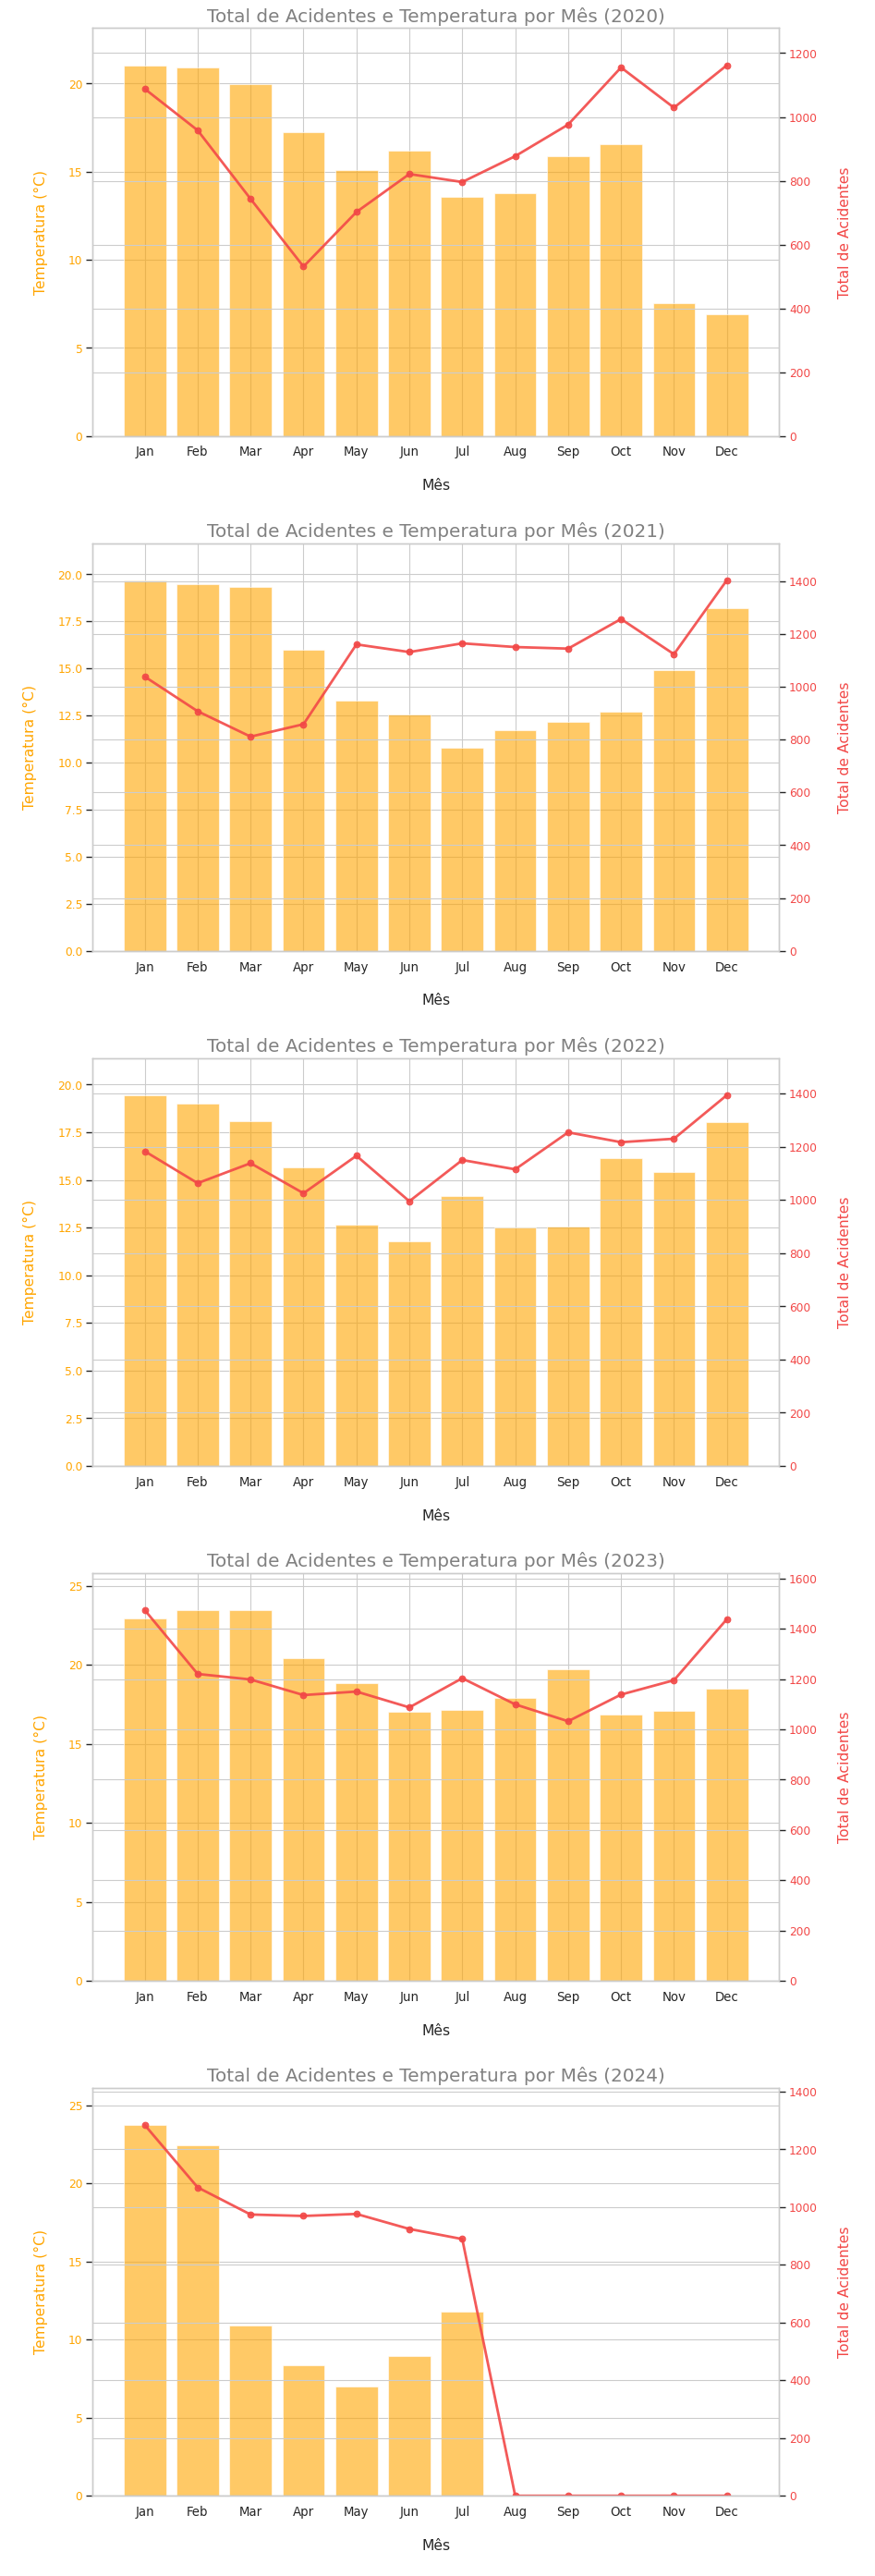

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Agregando os dados
acidentes_group = acidentes_df.groupby(['ano', "mes"]).count().reset_index()
precipitacao_group = temperatura_latlog_df.groupby(['ano', "mes"])['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean().reset_index()

# Configuração do estilo do Seaborn
sns.set_theme(style="whitegrid")

# Garantir que os meses estejam como inteiros
acidentes_group["mes"] = acidentes_group["mes"].astype(int)
precipitacao_group["mes"] = precipitacao_group["mes"].astype(int)

# Criar DataFrame de referência para garantir meses 1-12
todos_meses = pd.DataFrame({"mes": range(1, 13)})

# Criar a figura e os subplots
fig, axs = plt.subplots(len(acidentes_group['ano'].unique()), 1, figsize=(12, 7 * len(acidentes_group['ano'].unique())), dpi=80)

# Loop para cada ano
for i, ano in enumerate(acidentes_group['ano'].unique()):
    ax1 = axs[i] if len(acidentes_group['ano'].unique()) > 1 else axs

    # Dados do ano atual
    acidentes_ano = acidentes_group[acidentes_group['ano'] == ano]
    precitacao_ano = precipitacao_group[precipitacao_group['ano'] == ano]

    # Garantir que ambos os DataFrames tenham todos os meses
    acidentes_ano = pd.merge(todos_meses, acidentes_ano, on="mes", how="left").fillna(0)
    precitacao_ano = pd.merge(todos_meses, precitacao_ano, on="mes", how="left").fillna(0)

    plt.grid(axis='x', color='white', alpha=0)

    # Barras para precipitação
    ax1.bar(
        precitacao_ano["mes"],  # Garantir que os meses estão no eixo X
        precitacao_ano["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"], 
        color="orange", 
        alpha=0.6, 
        label="Temperatura"
    )
    ax1.set_ylabel("\nTemperatura (°C)\n", fontsize=14, color="orange")
    ax1.tick_params(axis="y", labelcolor="orange")
    ax1.set_ylim(0, precitacao_ano["TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)"].max() * 1.1)

    # Linha para acidentes
    ax2 = ax1.twinx()
    ax2.plot(
        acidentes_ano["mes"],  # Garantir que os meses estão no eixo X
        acidentes_ano["Data"],  # Ajustado para o campo correto
        color="#f24847", 
        alpha=0.9, 
        marker='o', 
        linewidth=2.5, 
        markersize=6, 
        label="Acidentes"
    )
    ax2.set_ylabel("\nTotal de Acidentes\n", fontsize=14, color="#f24847")
    ax2.tick_params(axis="y", labelcolor="#f24847")
    ax2.set_ylim(0, acidentes_ano["Data"].max() * 1.1)

    # Personalização do eixo X
    ax1.set_xticks(range(1, 13))  # Garante que o eixo vai de 1 a 12 (meses)
    ax1.set_xticklabels(
        ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
        fontsize=12,
        rotation=0,
        ha='center'
    )
    ax1.set_xlabel("\nMês\n", fontsize=14)

    # Título
    ax1.set_title(f"Total de Acidentes e Temperatura por Mês ({ano})", fontsize=18, color="gray")

# Ajuste do layout
plt.tight_layout()
plt.show()


In [17]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Agregando os dados
acidentes_diarios = acidentes_df.groupby(['Data', 'ano', 'mes']).size().reset_index(name='num_acidentes')
precipitacao_diaria = temperatura_latlog_df.groupby(['Data', 'ano', 'mes'])['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'].mean().reset_index()

# Convertendo a coluna 'Data' para datetime
acidentes_diarios['Data'] = pd.to_datetime(acidentes_diarios['Data'])
precipitacao_diaria['Data'] = pd.to_datetime(precipitacao_diaria['Data'])

# Unindo os DataFrames
df_consolidado = pd.merge(acidentes_diarios, precipitacao_diaria, on=['Data', 'ano', 'mes'], how='inner')

# Lista de anos únicos
anos = df_consolidado['ano'].unique()

# Criando subplots com um gráfico por ano
fig = make_subplots(rows=len(anos), cols=1, 
                    subplot_titles=[f"Ano: {ano}" for ano in anos])

# Adicionando dados ao gráfico
for i, ano in enumerate(anos, start=1):
    dados_ano = df_consolidado[df_consolidado['ano'] == ano]
    
    # Linha para Número de Acidentes
    fig.add_trace(
        go.Scatter(
            x=dados_ano['Data'], 
            y=dados_ano['num_acidentes'], 
            mode='lines+markers',
            name=f"Número de Acidentes ({ano})",
            line=dict(color='#f24847', width=2),
            marker=dict(size=5),
            yaxis="y1",
            hovertemplate=(
                "<b>Data:</b> %{x|%d-%m-%Y}<br>" +
                "<b>Número de Acidentes:</b> %{y}<br>" +
                "<b>Temperatura (°C):</b> %{customdata}<extra></extra>"
            ),
            customdata=dados_ano['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)']
        ),
        row=i, col=1
    )
    
    # Linha para Precipitação
    fig.add_trace(
        go.Scatter(
            x=dados_ano['Data'], 
            y=dados_ano['TEMPERATURA DO AR - BULBO SECO, HORARIA (°C)'], 
            mode='lines+markers',
            name=f"Temperatura (°C) ({ano})",
            line=dict(color='orange', width=2),
            marker=dict(size=5),
            yaxis="y2",
            hovertemplate=(
                "<b>Data:</b> %{x|%d-%m-%Y}<br>" +
                "<b>Temperatura (°C):</b> %{y}<extra></extra><br>" +
                "<b>Número de Acidentes:</b> %{customdata}" 
            ),
            customdata=dados_ano['num_acidentes']
        ),
        row=i, col=1
    )
    
    # Configurando os eixos
    fig.update_yaxes(title_text="Número de Acidentes", titlefont=dict(color='#f24847'), 
                     tickfont=dict(color='#f24847'), row=i, col=1, secondary_y=False)
    fig.update_yaxes(title_text="Temperatura (°C)", titlefont=dict(color='skyblue'), 
                     tickfont=dict(color='skyblue'), row=i, col=1, secondary_y=True)

# Ajustes finais no layout
fig.update_layout(
    height=600 * len(anos),  # Altura dinâmica com base no número de anos
    width=2000,
    title="Número de Acidentes e Temperatura Diária por Ano",
    title_x=0.5,
    showlegend=False,
    xaxis=dict(title="Data"),
)

# Exibir o gráfico
fig.show()


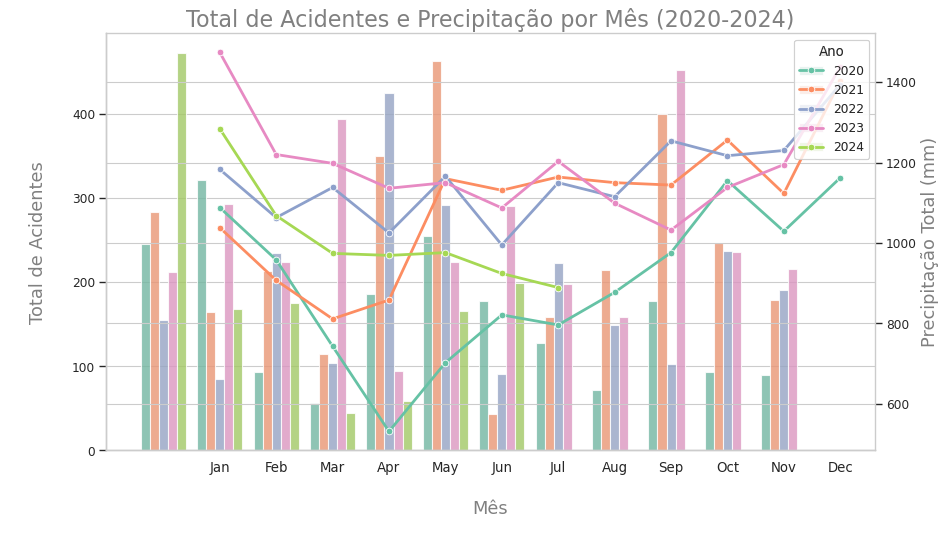

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

acidentes_group = acidentes_df.groupby(['ano', "mes"]).count().reset_index()
precipitacao_mensal = precipitacao_latlog_df.groupby(['ano', "mes"])['PRECIPITAÇÃO TOTAL, HORÁRIO (mm)'].sum().reset_index()

# Garantir que os meses estejam como inteiros
acidentes_group["mes"] = acidentes_group["mes"].astype(int)
precipitacao_mensal["mes"] = precipitacao_mensal["mes"].astype(int)

todos_meses = pd.DataFrame({"mes": range(1, 13)})

precipitacao_group = pd.merge(todos_meses, precipitacao_mensal, on="mes", how="left").fillna(0)
acidentes_group = pd.merge(todos_meses, acidentes_group, on="mes", how="left").fillna(0)

# Configuração do estilo do Seaborn
sns.set_theme(style="whitegrid")

fig, ax1 = plt.subplots(figsize=(12, 7), dpi=80)

sns.barplot(
    data=precipitacao_mensal,
    x="mes",
    y="PRECIPITAÇÃO TOTAL, HORÁRIO (mm)",
    hue="ano",
    dodge=True,
    palette="Set2",
    alpha=0.8,
    ax=ax1
)

ax2 = ax1.twinx()

# Linha de acidentes por mês
sns.lineplot(
    data=acidentes_group,
    x="mes",
    y="Data",
    hue="ano",
    marker='o',
    palette="Set2",
    linewidth=2.5,
    markersize=6,
    ax=ax2
)

# Ajustar rótulos e legenda
ax2.set_ylabel("Precipitação Total (mm)", fontsize=16, color='gray')
ax2.legend(title="Ano", loc="upper right")

# Personalização do gráfico
ax1.set_title("Total de Acidentes e Precipitação por Mês (2020-2024)", fontsize=20, color='gray')
ax1.set_xticks(range(1, 13))
ax1.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=12)
ax1.set_xlabel("\nMês\n", fontsize=16, color='gray')
ax1.set_ylabel("\nTotal de Acidentes\n", fontsize=16, color='gray')

# Esconder bordas do gráfico principal
ax1.spines["top"].set_visible(False)
ax1.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()
